In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


sol = pd.read_csv("solubility.csv")
X = sol.drop(columns=['logS'])
y = sol['logS']

X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2,random_state=100)

#using linear regression
lr= LinearRegression()
lr.fit(X_train, y_train)
train_pred = lr.predict(X_train)
test_pred = lr.predict(X_test)

train_mse = mean_squared_error(y_train, train_pred)
train_r2 = r2_score(y_train,train_pred) 

test_mse = mean_squared_error(y_test, test_pred)
test_r2 = mean_squared_error(y_test,test_pred)
print(train_mse)
print(train_r2 )
print(test_mse)
print(test_r2)

lr_results = pd.DataFrame(["LinearRegression", train_mse,train_r2,test_mse,test_r2 ]).transpose()
lr_results.columns =  ("method", "training mse", "training r2", "testing mse", "testing r2") 
lr_results

1.007536295109369
0.7645051774663391
1.0206953660861033
1.0206953660861033


,method,training mse,training r2,testing mse,testing r2
0,LinearRegression,1.007536,0.764505,1.020695,1.020695


In [10]:
# using random forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(X_train,y_train)
train_pred = rf.predict(X_train)
test_pred = rf.predict(X_test)

train_mse = mean_squared_error(y_train, train_pred)
train_r2 = r2_score(y_train,train_pred) 

test_mse = mean_squared_error(y_test, test_pred)
test_r2 = mean_squared_error(y_test,test_pred)
print(train_mse)
print(train_r2 )
print(test_mse)
print(test_r2)

rf_results = pd.DataFrame(["RandomForest", train_mse,train_r2,test_mse,test_r2 ]).transpose()
rf_results.columns =  ("method", "training mse", "training r2", "testing mse", "testing r2") 
rf_results


1.028227802112806
0.7596688824431413
1.407688264904896
1.407688264904896


,method,training mse,training r2,testing mse,testing r2
0,RandomForest,1.028228,0.759669,1.407688,1.407688


In [17]:
df_models= pd.concat([lr_results, rf_results], axis=0)
hr= df_models.reset_index(drop=True)
hr

,method,training mse,training r2,testing mse,testing r2
0,LinearRegression,1.007536,0.764505,1.020695,1.020695
1,RandomForest,1.028228,0.759669,1.407688,1.407688


<function matplotlib.pyplot.show(close=None, block=None)>

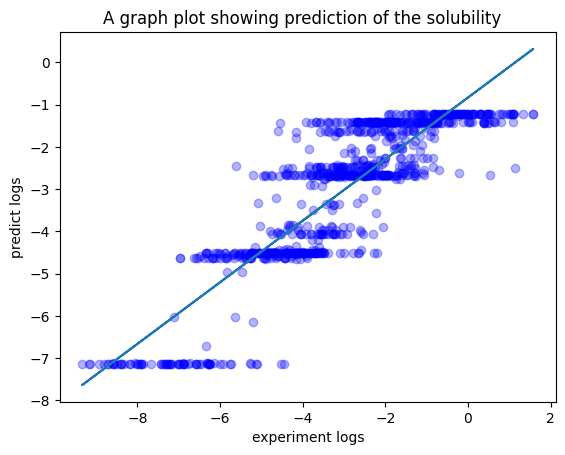

In [21]:
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(x=y_train, y=train_pred, color="blue", alpha=0.3 )
z=np.polyfit(y_train,train_pred,1)
p = np.poly1d(z)
plt.plot(y_train, p(y_train), '')

plt.xlabel("experiment logs")
plt.ylabel("predict logs")
plt.title("A graph plot showing prediction of the solubility  ")

plt.show